In [1]:
import os
import shutil
import itertools
from glob import glob
import random
from collections import Counter
import numpy as np
import pandas as pd

import keras
from keras import layers
from keras import models
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.utils import plot_model
from keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import class_weight
from sklearn.model_selection import KFold
from scipy import interp
from itertools import cycle

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


Using TensorFlow backend.


In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
os.chdir('C:\\Users\\Christopher\\Machine_Learning')

# Load Data

In [4]:
x_train = np.load('datasets/plant_village_split/SMOTE_x_train.npy')
y_train = np.load('datasets/plant_village_split/SMOTE_y_train.npy')
x_val = np.load('datasets/plant_village_split/SMOTE_x_val.npy')
y_val = np.load('datasets/plant_village_split/SMOTE_y_val.npy')
x_test = np.load('datasets/plant_village_split/x_test.npy')
y_test = np.load('datasets/plant_village_split/y_test.npy')

# Dataset Distribution

In [1]:
train_count=[]
val_count=[]
whole_count=[]

print('TRAINING SET')
files= os.listdir("datasets/plant_village_split/train")
for type in files:
    count = os.listdir('datasets/plant_village_split/train/'+type+'/')
    print(type+ "  "+ str(len(count)))
    train_count.append(len(count))
print()

print('VALIDATION SET')
files= os.listdir('datasets/plant_village_split/val')
for type in files:
    count = os.listdir('datasets/plant_village_split/val/'+type+'/')
    print(type+ "  "+ str(len(count)))
    val_count.append(len(count))

print()

print('TEST SET')
files= os.listdir('datasets/plant_village_split/test')

for type in files:
    count = os.listdir('datasets/plant_village_split/test/'+type+'/')
    print(type+ "  "+ str(len(count)))
    whole_count.append(len(count))

TRAINING SET


NameError: name 'os' is not defined

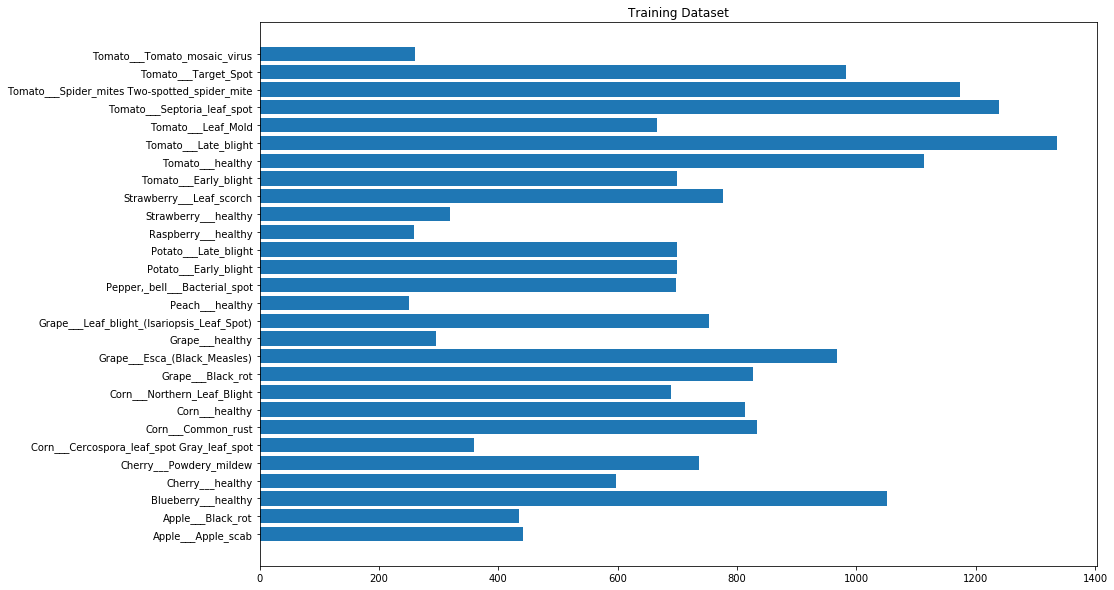

In [6]:
plt.barh(files, train_count,)
plt.title('Training Dataset')
plt.show()

In [2]:
plt.barh(files, val_count,)
plt.title('Validation Set')
plt.show()

NameError: name 'plt' is not defined

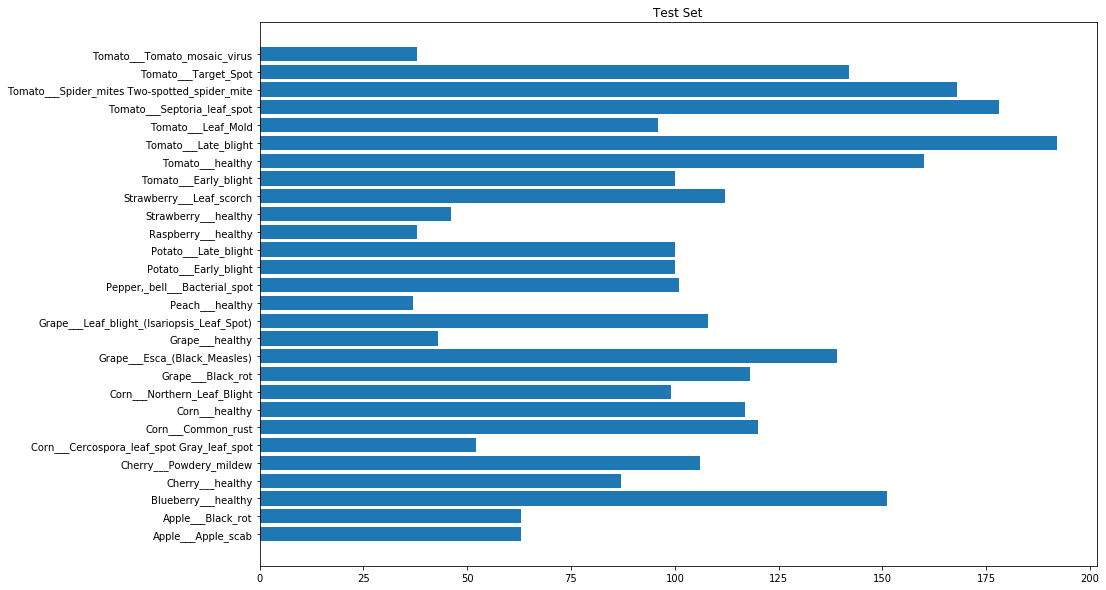

In [8]:
plt.barh(files, whole_count,)
plt.title('Test Set')
plt.show()

# Model

In [9]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, AveragePooling2D
model = models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), activation='relu', ))
model.add(AveragePooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', ))
model.add(Conv2D(64, (3, 3), activation='relu', ))
model.add(AveragePooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu',))
model.add(Dropout(.50))
model.add(Dense(28, activation='softmax'))

# compile model
model.compile(optimizer=Adam(lr=.001), loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 64)       

In [10]:
print(model.summary())
opt = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 64)       

In [11]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val,y_val) )

Train on 37408 samples, validate on 10668 samples
Epoch 1/30
37408/37408 [==============================] - 24s 635us/step - loss: 1.2785 - accuracy: 0.6409 - val_loss: 1.3106 - val_accuracy: 0.6309
Epoch 2/30
37408/37408 [==============================] - 19s 498us/step - loss: 0.5542 - accuracy: 0.8294 - val_loss: 1.3426 - val_accuracy: 0.6843
Epoch 3/30
37408/37408 [==============================] - 19s 499us/step - loss: 0.3572 - accuracy: 0.8845 - val_loss: 0.7102 - val_accuracy: 0.8301
Epoch 4/30
37408/37408 [==============================] - 20s 523us/step - loss: 0.2687 - accuracy: 0.9147 - val_loss: 0.6129 - val_accuracy: 0.8391
Epoch 5/30
37408/37408 [==============================] - 21s 573us/step - loss: 0.2139 - accuracy: 0.9303 - val_loss: 0.4626 - val_accuracy: 0.8655
Epoch 6/30
37408/37408 [==============================] - 20s 537us/step - loss: 0.1681 - accuracy: 0.9443 - val_loss: 0.3551 - val_accuracy: 0.9030
Epoch 7/30
37408/37408 [==============================] 

In [12]:
probs = model.predict(x_test)
y_test = y_test.argmax(axis=1)

In [13]:
probs=probs.argmax(axis=1)

# Analysis

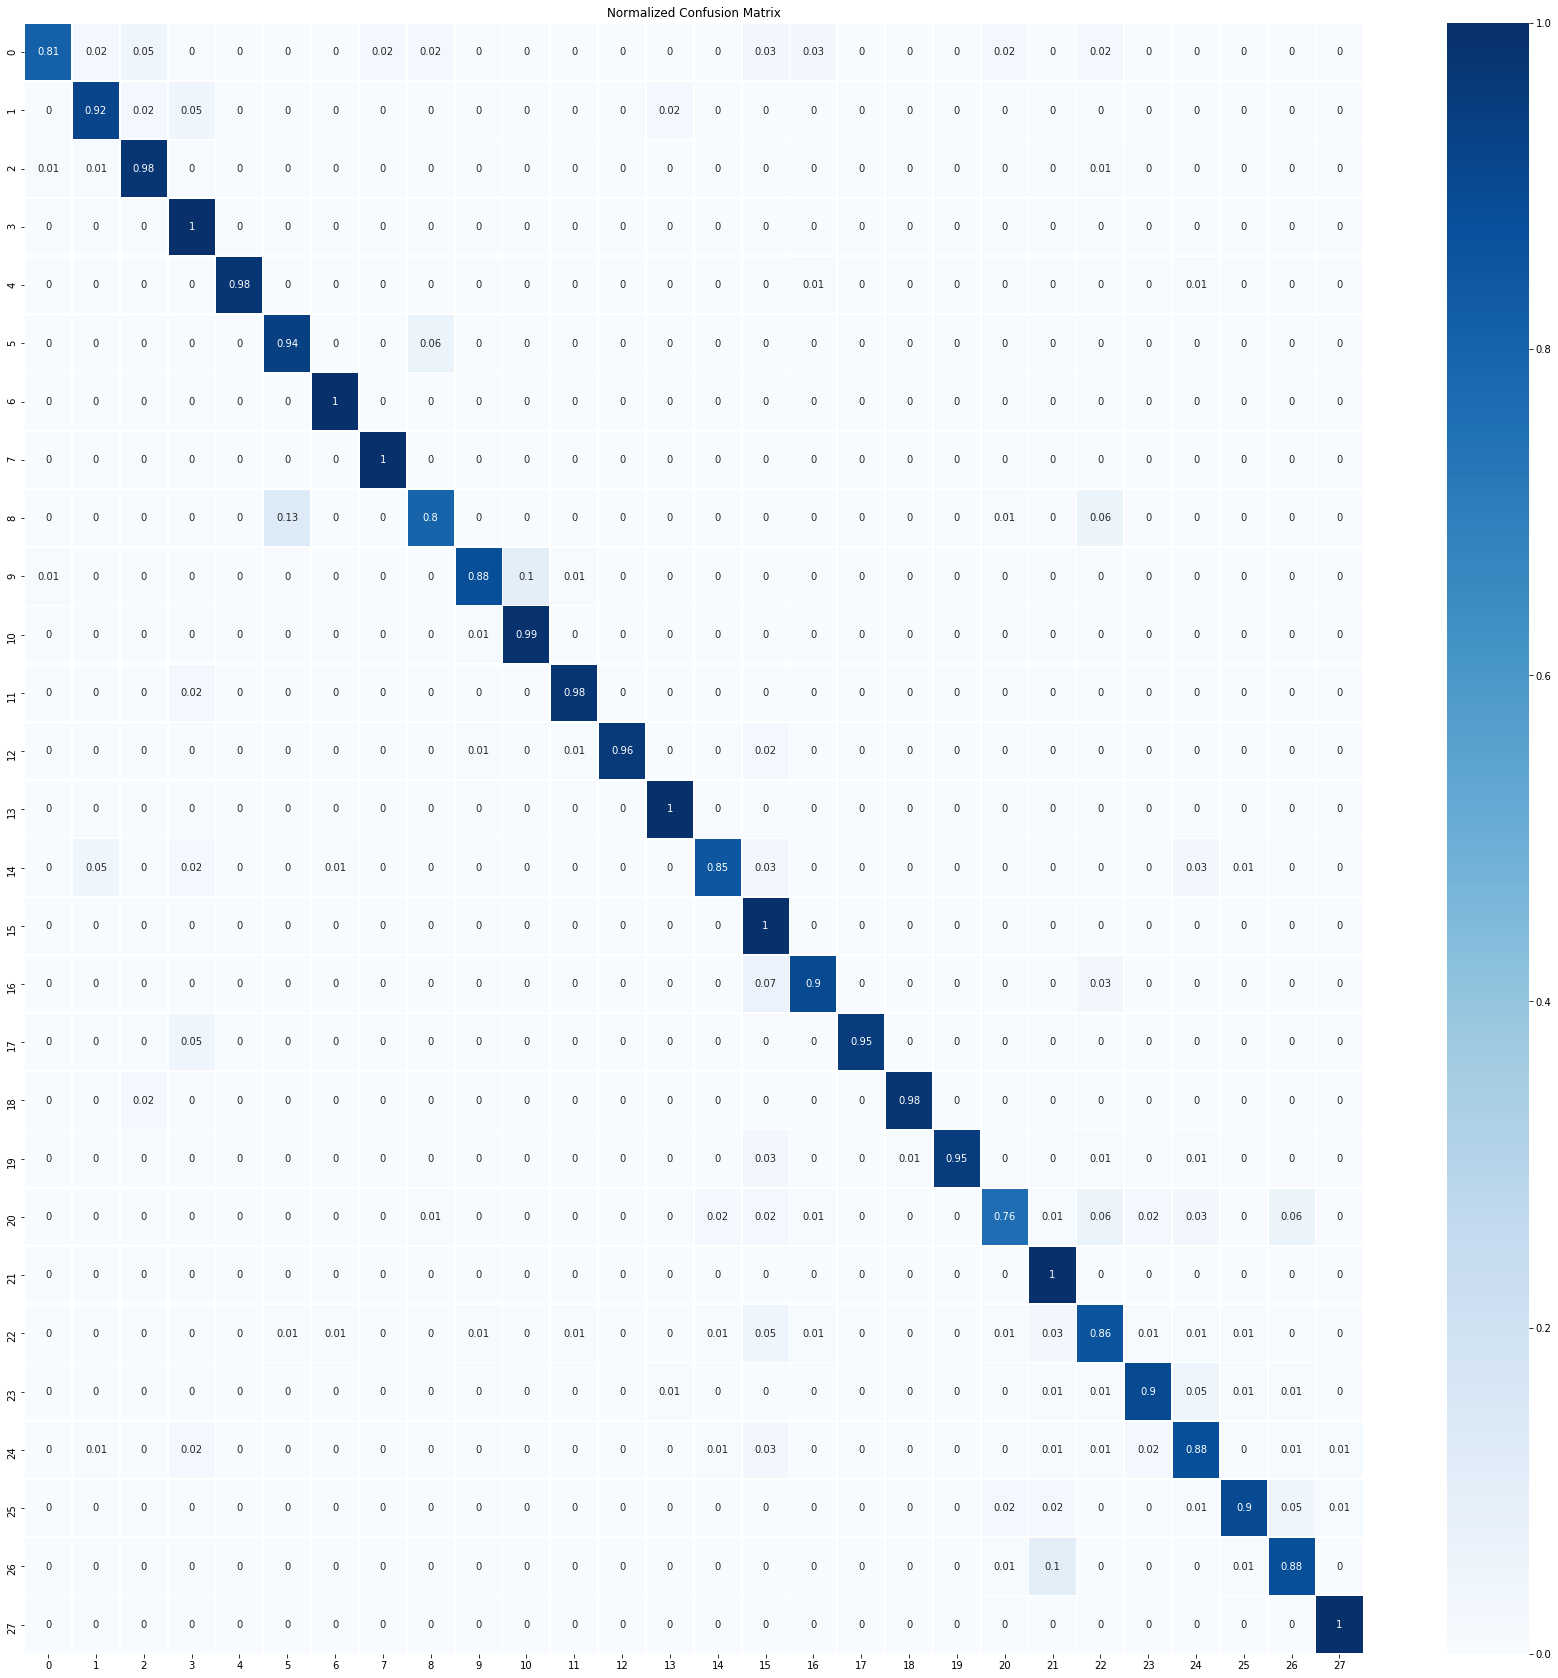

In [14]:
con_matrix = confusion_matrix(y_test, probs,)
con_matrix = con_matrix / con_matrix.sum(axis=1, keepdims=True)
con_matrix = np.around(con_matrix, 2)
plt.figure(figsize=(30,30))
plt.title('Normalized Confusion Matrix')
sns.heatmap(con_matrix, annot=True, linewidths=.75, cmap="Blues")

In [15]:
print(classification_report(y_test, probs, digits=4))

              precision    recall  f1-score   support

           0     0.9623    0.8095    0.8793        63
           1     0.8788    0.9206    0.8992        63
           2     0.9673    0.9801    0.9737       151
           3     0.8878    1.0000    0.9405        87
           4     1.0000    0.9811    0.9905       106
           5     0.7778    0.9423    0.8522        52
           6     0.9756    1.0000    0.9877       120
           7     0.9915    1.0000    0.9957       117
           8     0.9405    0.7980    0.8634        99
           9     0.9720    0.8814    0.9244       118
          10     0.9200    0.9928    0.9550       139
          11     0.9333    0.9767    0.9545        43
          12     1.0000    0.9630    0.9811       108
          13     0.9487    1.0000    0.9737        37
          14     0.9556    0.8515    0.9005       101
          15     0.7519    1.0000    0.8584       100
          16     0.9474    0.9000    0.9231       100
          17     1.0000    

In [16]:
y_test = label_binarize(y_test,classes=np.arange(0,29,1))
y_score = label_binarize(probs, classes=np.arange(0,29,1))

C:\Users\Christopher\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


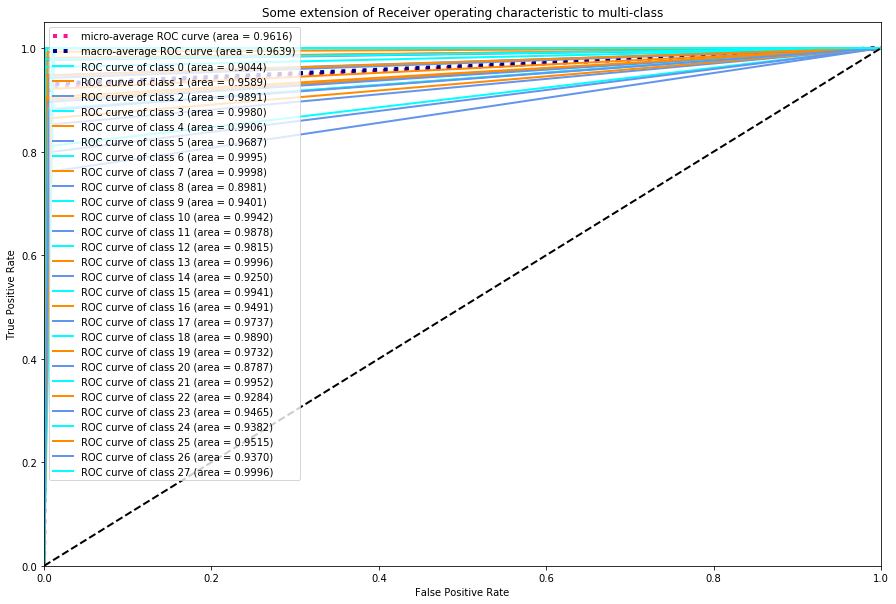

In [17]:
n_classes=28
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="upper left")
plt.show()

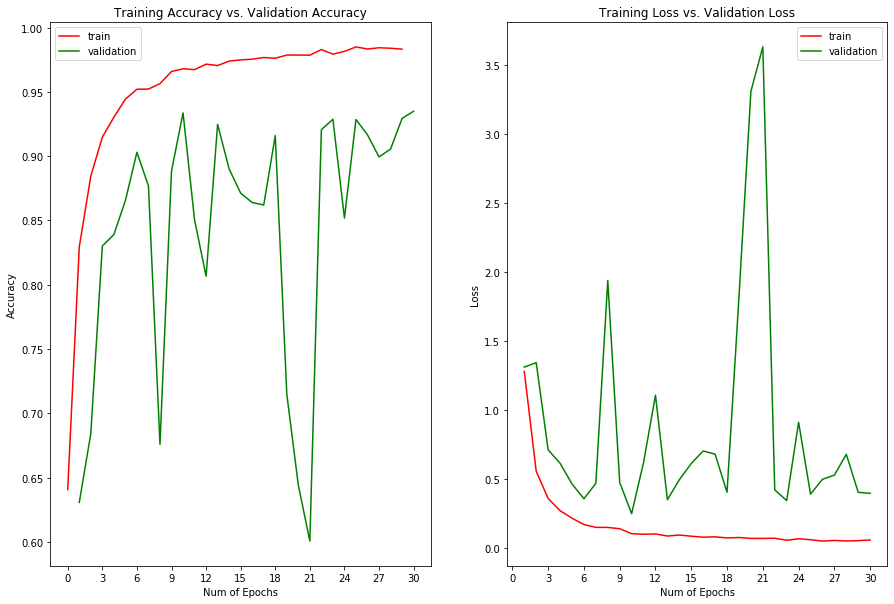

In [18]:
# summarize history for accuracy
plt.subplot(1, 2 ,1)
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], 'r')
plt.plot(np.arange(1, len(history.history['val_accuracy'])+1), history.history['val_accuracy'], 'g')
plt.xticks(np.arange(0, 30+1, 30/10))
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
  
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(history.history['loss'])+1), history.history['loss'], 'r')
plt.plot(np.arange(1, len(history.history['val_loss'])+1), history.history['val_loss'], 'g')
plt.xticks(np.arange(0, 30+1, 30/10))
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
  
  
plt.show()

In [19]:
df = pd.DataFrame((history.history['accuracy'],history.history['val_accuracy'],history.history['loss'],history.history['val_loss'])).T
df.columns=['Acc', 'Val_Acc', 'Loss', 'Val_Loss']
df.index.name='Epoch'
df.index=np.arange(1,31,1)
df

,Acc,Val_Acc,Loss,Val_Loss
1,0.640879,0.630859,1.278529,1.310630
2,0.829448,0.684289,0.554221,1.342610
3,0.884543,0.830146,0.357240,0.710242
4,0.914697,0.839051,0.268694,0.612853
5,0.930256,0.865486,0.213870,0.462648
6,0.944290,0.902981,0.168115,0.355101
7,0.952016,0.876922,0.147699,0.467011
8,0.952149,0.675947,0.147013,1.938391
9,0.956373,0.888358,0.137729,0.473778
10,0.965783,0.933633,0.101522,0.246671


In [20]:
df.to_csv('CSVs/plant_village/smote/CNN/SMOTE.csv')

In [21]:
model.save('models/plant_village/smote/CNN/SMOTE.h5')